Welcome to this analysis of the /r/languagelearning subreddit survey data. Before I begin I should mention a bit about myself. In addition to my role as the moderator of [the /r/languagelearning subreddit on reddit](https://www.reddit.com/r/languagelearning/), I am also the author of the ebook [How to Teach Yourself a Foreign Language](https://sajforbes.github.io/ebook/), which is available for free on my website. I am also a data analyst in my real life.

This post is intended to help give people an overview of the survey data, as well as show anyone interested how they can do so using Python.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

First we need to view our data to get a quick idea of what is in it.

In [2]:
df = pd.read_csv(".spyder-py3\surveyfull2.csv")
df.head()

,Age,selftaught_to_nonselftaught,native_langs,fluent_nonnative_langs,langs_actively_learning,beginner_nonnative_langs,total_langs,rank_natural_talent,rank_motivation,rank_environment,...,self_important_fluent,self_nervous,mins_per_day,level_education,level_education.1,gender,country_living,country_from,specific_goal,studied_in_uni
0,13.0,1.0,1.0,0.0,6.0,2.0,7.0,4.0,7.0,7.0,...,4.0,4.0,120.0,Below high-school diploma,NaN,Female,United States,United States,Yes,I have not attended a college/university
1,13.0,1.0,1.0,0.0,2.0,1.0,3.0,2.0,5.0,2.0,...,2.0,1.0,30.0,Below high-school diploma,NaN,Male,Australia,Australia,Unsure,I have not attended a college/university
2,13.0,5.0,1.0,0.0,4.0,1.0,5.0,3.0,6.0,6.0,...,5.0,4.0,30.0,Below high-school diploma,NaN,Male,United Kingdom,United Kingdom,Unsure,I have not attended a college/university
3,13.0,3.0,1.0,0.0,4.0,4.0,5.0,4.0,7.0,7.0,...,7.0,1.0,60.0,Below high-school diploma,NaN,Female,United States,United States,No,I have not attended a college/university
4,13.0,3.0,1.0,0.0,1.0,2.0,3.0,2.0,6.0,5.0,...,4.0,5.0,1200.0,Below high-school diploma,NaN,Female,United States,United States,Unsure,I have not attended a college/university


Let's look at the data dimensionality.

In [3]:
df.shape

(844, 34)

And get some more info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 34 columns):
Age                            815 non-null float64
selftaught_to_nonselftaught    838 non-null float64
native_langs                   840 non-null float64
fluent_nonnative_langs         806 non-null float64
langs_actively_learning        811 non-null float64
beginner_nonnative_langs       811 non-null float64
total_langs                    802 non-null float64
rank_natural_talent            842 non-null float64
rank_motivation                843 non-null float64
rank_environment               842 non-null float64
rank_selfconfidence            842 non-null float64
rank_grammar                   842 non-null float64
rank_speaking_early            841 non-null float64
rank_have_teacher              842 non-null float64
rank_listenread                842 non-null float64
rank_drill_vocab               841 non-null float64
rank_pronunciation             843 non-null float64
self_succes

Now we need to get an overview of the data

In [5]:
df.describe(include='all')

,Age,selftaught_to_nonselftaught,native_langs,fluent_nonnative_langs,langs_actively_learning,beginner_nonnative_langs,total_langs,rank_natural_talent,rank_motivation,rank_environment,...,self_important_fluent,self_nervous,mins_per_day,level_education,level_education.1,gender,country_living,country_from,specific_goal,studied_in_uni
count,815.000000,838.000000,840.000000,806.000000,811.000000,811.000000,802.000000,842.000000,843.000000,842.000000,...,839.000000,835.000000,808.000000,832,0.0,842,828,815,837,831
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,NaN,7,64,69,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,College/University degree,NaN,Male,United States,United States,Yes,I attend or have attended college/university a...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,230,NaN,517,353,360,430,331
mean,23.501840,3.291169,1.153571,0.892060,1.844636,2.004932,4.114713,3.359857,6.642942,5.064133,...,4.836710,3.368862,176.705446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.761157,1.727200,0.407307,0.913399,1.288326,1.618558,2.038777,1.474300,0.687110,1.386420,...,1.601994,1.652115,2536.784836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18.000000,2.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,6.000000,4.000000,...,4.000000,2.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,22.000000,3.000000,1.000000,1.000000,2.000000,2.000000,4.000000,3.000000,7.000000,5.000000,...,5.000000,3.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,27.000000,5.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,7.000000,6.000000,...,6.000000,5.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Already there's a lot of information if you know what the columns mean. The *rank_* questions asked people how they ranked the importance of certain aspects for learning from 1 to 7. 1 being not at all important and 7 being very important. You can see, for example, that people on average ranked motivation (mean = 6.6) far more highly than natural talent (mean = 3.4). 

*self_* questions ask people to rank their themselves from 1 to 7 on any trait. For example, *self_important_fluent* asks people how important reaching fluency is to them. 

We can also see some oddities. You might have noticed there is a blank column and that somebody stated they studied for 72,000 minutes per day---that's 1,200 hours day. Stated differently, this person claims to study 50 days every day! Now that's efficiency!

Before we do further analysis let's do some quick cleaning.

In [6]:
df = df.drop(["level_education.1"], axis=1) # duplciate column
df = df[df.mins_per_day < 14*60] # Study over 14 hours per day ignored

In [7]:
df.describe()

,Age,selftaught_to_nonselftaught,native_langs,fluent_nonnative_langs,langs_actively_learning,beginner_nonnative_langs,total_langs,rank_natural_talent,rank_motivation,rank_environment,...,self_successful,self_talented,self_enjoy,self_motivated,self_noncommitted,self_confident_speaker,self_easy,self_important_fluent,self_nervous,mins_per_day
count,778.000000,795.000000,796.000000,765.000000,770.000000,772.000000,765.000000,798.000000,799.000000,798.000000,...,798.000000,797.000000,799.000000,797.000000,798.000000,796.000000,798.000000,799.000000,795.000000,799.000000
mean,23.586118,3.293082,1.148241,0.888889,1.850649,2.001295,4.141176,3.345865,6.644556,5.050125,...,4.817043,4.007528,6.221527,5.828105,4.276942,3.052764,3.219298,4.804756,3.364780,72.312891
std,7.836056,1.722832,0.402051,0.914940,1.276895,1.544413,2.065914,1.471836,0.687385,1.380994,...,1.450690,1.659431,1.064222,1.190124,2.030444,1.697865,1.564435,1.604951,1.640258,89.975907
min,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,18.000000,2.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,6.000000,4.000000,...,4.000000,3.000000,6.000000,5.000000,3.000000,2.000000,2.000000,4.000000,2.000000,30.000000
50%,22.000000,3.000000,1.000000,1.000000,2.000000,2.000000,4.000000,3.000000,7.000000,5.000000,...,5.000000,4.000000,7.000000,6.000000,4.000000,3.000000,3.000000,5.000000,3.000000,50.000000
75%,27.000000,5.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,7.000000,6.000000,...,6.000000,5.000000,7.000000,7.000000,6.000000,4.000000,4.000000,6.000000,5.000000,90.000000
max,75.000000,7.000000,5.000000,6.000000,20.000000,17.000000,20.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,720.000000


Now having removed the most eggregious survey entries. Let's take a closer look at some of the stats.

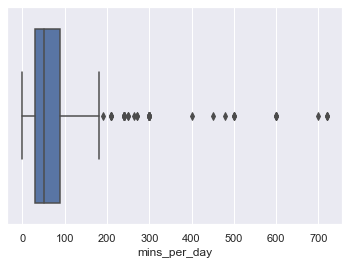

In [8]:
sns.boxplot(x=df['mins_per_day'])


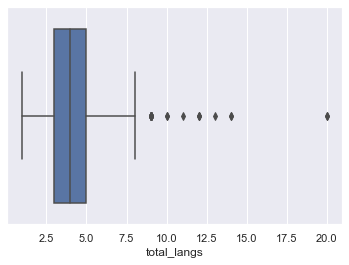

In [9]:
sns.boxplot(x=df['total_langs'])

Let's look at how many languages our survey respondents claim to know.

1.0      17
2.0     123
3.0     186
4.0     184
5.0     116
6.0      65
7.0      27
8.0      20
9.0      16
10.0      2
11.0      1
12.0      3
13.0      1
14.0      2
20.0      2
Name: total_langs, dtype: int64


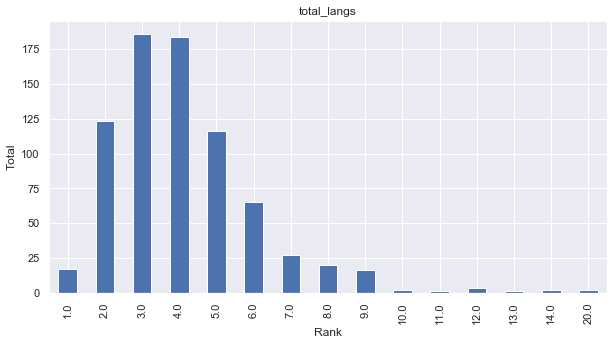

In [10]:
col = 6
df_rank1 = df.iloc[:,col].value_counts().sort_index()
print(df_rank1)
dr_rank_title = df.columns[col]
df_rank1.plot(kind='bar', figsize=(10,5)) 
plt.title(f'{dr_rank_title}')
plt.ylabel('Total')
plt.xlabel('Rank')
plt.show()


Text(0, 0.5, 'Respondents')

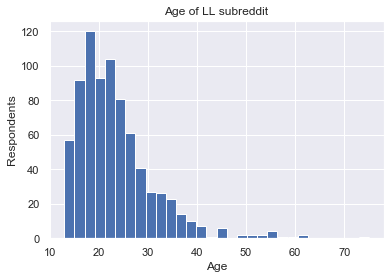

In [14]:
fig, ax = plt.subplots()
ax.hist(df['Age'],bins=30)
ax.set_title('Age of LL subreddit')
ax.set_xlabel('Age')
ax.set_ylabel('Respondents')

Text(0, 0.5, 'mins per day')

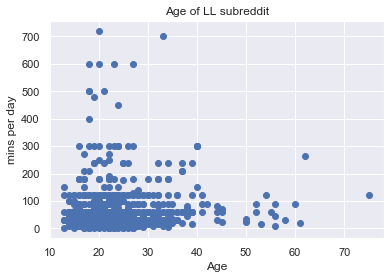

In [12]:
fig, ax = plt.subplots()

ax.scatter(df['Age'],df['mins_per_day'])
ax.set_title('Age of LL subreddit')
ax.set_xlabel('Age')
ax.set_ylabel('mins per day')

That should do for a rough overview of what our data looks like. We're going to do some more complex detailing and analysis of the different categories in another post. As a quick overview I thought it would be interesting to show you a correlation heatmap of the data.

,Age,selftaught_to_nonselftaught,native_langs,fluent_nonnative_langs,langs_actively_learning,beginner_nonnative_langs,total_langs,rank_natural_talent,rank_motivation,rank_environment,...,self_successful,self_talented,self_enjoy,self_motivated,self_noncommitted,self_confident_speaker,self_easy,self_important_fluent,self_nervous,mins_per_day
Age,1.000000,-0.049360,-0.068234,0.065185,-0.090841,0.115427,0.074541,0.016116,-0.024358,-0.057550,...,0.135989,-0.022964,-0.060612,0.053003,-0.087184,0.044569,-0.024391,-0.126233,0.035694,0.055779
selftaught_to_nonselftaught,-0.049360,1.000000,-0.045129,0.075294,-0.014417,0.013082,0.063210,0.129085,0.010278,0.237619,...,0.078411,0.115888,-0.000885,-0.003076,0.068024,-0.067434,-0.007811,-0.000794,0.053301,0.004746
native_langs,-0.068234,-0.045129,1.000000,0.093972,0.051255,0.041615,0.223543,0.015578,0.032273,-0.019628,...,0.028820,0.018531,0.025352,0.014098,0.103867,0.078538,0.025445,0.078112,0.084608,0.037796
fluent_nonnative_langs,0.065185,0.075294,0.093972,1.000000,0.153265,0.122284,0.514590,0.080046,-0.038779,-0.003143,...,0.325396,0.202039,0.143059,0.104210,0.088634,0.133118,0.188687,0.024184,0.190959,0.084584
langs_actively_learning,-0.090841,-0.014417,0.051255,0.153265,1.000000,0.271547,0.279184,-0.032844,0.003287,0.047356,...,0.036267,0.097037,0.159254,0.052559,0.333030,0.065184,0.064374,-0.004450,0.035826,0.088911
beginner_nonnative_langs,0.115427,0.013082,0.041615,0.122284,0.271547,1.000000,0.689796,0.056977,0.039130,-0.052178,...,0.036697,0.131876,0.144715,0.049056,0.275977,-0.015925,0.075668,-0.141902,-0.027279,0.095493
total_langs,0.074541,0.063210,0.223543,0.514590,0.279184,0.689796,1.000000,0.055336,0.007343,-0.030046,...,0.216415,0.224953,0.209993,0.096781,0.279531,0.090774,0.171398,-0.122129,0.101497,0.113029
rank_natural_talent,0.016116,0.129085,0.015578,0.080046,-0.032844,0.056977,0.055336,1.000000,-0.019554,0.135906,...,-0.032580,0.248375,-0.050348,-0.085590,0.069105,-0.003105,0.057980,0.120732,0.016677,0.049108
rank_motivation,-0.024358,0.010278,0.032273,-0.038779,0.003287,0.039130,0.007343,-0.019554,1.000000,0.053157,...,-0.016075,0.006743,0.140320,0.117191,0.064384,-0.019518,-0.080429,0.059692,-0.047703,0.021191
rank_environment,-0.057550,0.237619,-0.019628,-0.003143,0.047356,-0.052178,-0.030046,0.135906,0.053157,1.000000,...,-0.110170,-0.015515,-0.061298,-0.114870,0.144487,-0.010814,-0.083982,-0.022240,0.016783,0.015630


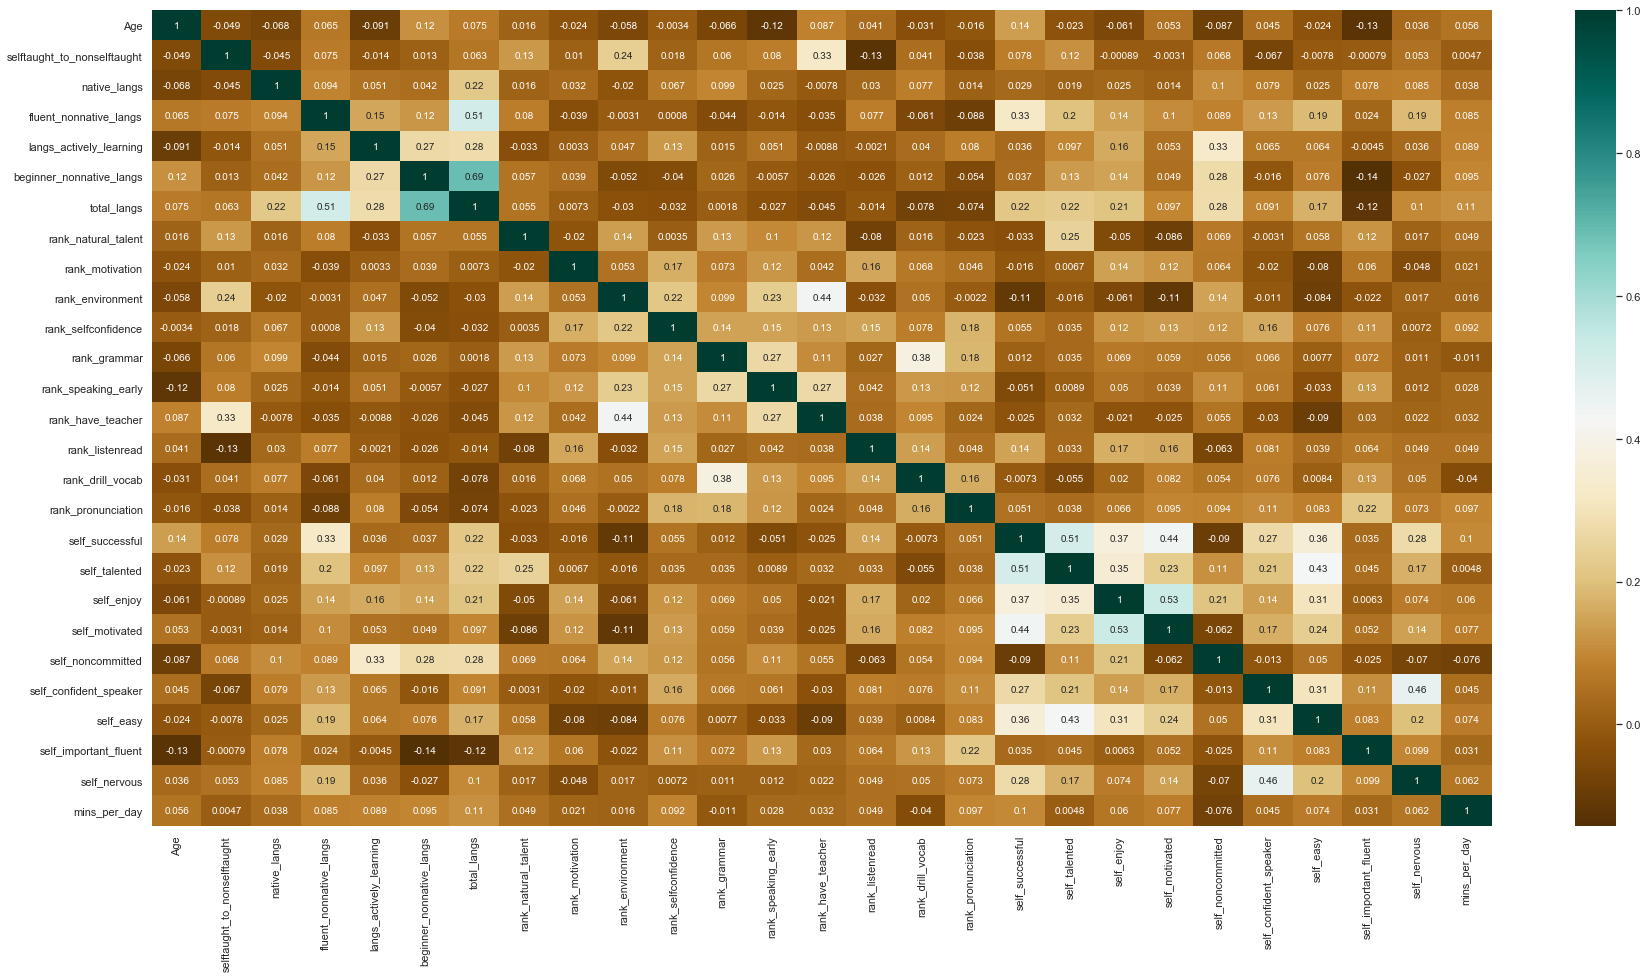

In [13]:
plt.figure(figsize=(30,15))
heatmp = df.corr()
sns.heatmap(heatmp,cmap="BrBG",annot=True)
heatmp

Some interesting correlations stand out. For example:
* People who rank themselves as talented are more likely to say that talent is an important factor in determining success.
* People who felt that studying grammar was important also tended to recommend drilling vocabulary.
* People who rank the environment as being important also rended to rank having a teacher as important also.
* There is a strong correlation between a variety of self-rankings around high success, talent, motivation, and enjoyment. This grouping was also more likely to report finding language learning easy.
* People who said they struggled with committing to a single language also tended to speak more languages at a beginner level, but this did not extend to a strong correlation with fluent-level languages. They also reported learning more languages at the same time. Surprise, surprise!
* It is hard to find any correlation between the number of fluent non-native languages and the types of strategies people tend to recommend. It seems like anything can work.
* Younger people tended to rank reaching fluency as less important. This is not a very strong correlation, however.




That should do for now. Be sure to keep an eye out for the more advanced analysis in the next post. We'll be doing some linear regression to see if we can tease out more complex relations. Thanks for reading!